In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Lab Topic 2

# 1. Antenna patterns
## Analytical forms
$F_+(\theta,\phi)=\frac{1}{2}(1+\cos^2\theta)\cos2\phi $ 

$F_\times(\theta,\phi)=\cos\theta\sin2\phi $

In [2]:
theta=sp.pi/4 # *********************************************
phi=sp.pi/4

# theta=0
# phi=sp.pi/4

def F_plus(theta,phi):
    if theta==0 or theta==sp.pi:
        phi=0
    else:
        phi=phi
    return 1/2*(1+sp.cos(theta)**2)*sp.cos(2*phi)

def F_cross(theta,phi):
    if theta==0 or theta==sp.pi:
        phi=0
    else:
        phi=phi
    return sp.cos(theta)*sp.sin(2*phi)

print('theta =',theta)
print('phi =',phi)
print('F_plus =',F_plus(theta,phi))
print('F_cross =',F_cross(theta,phi))

theta = pi/4
phi = pi/4
F_plus = 0
F_cross = sqrt(2)/2


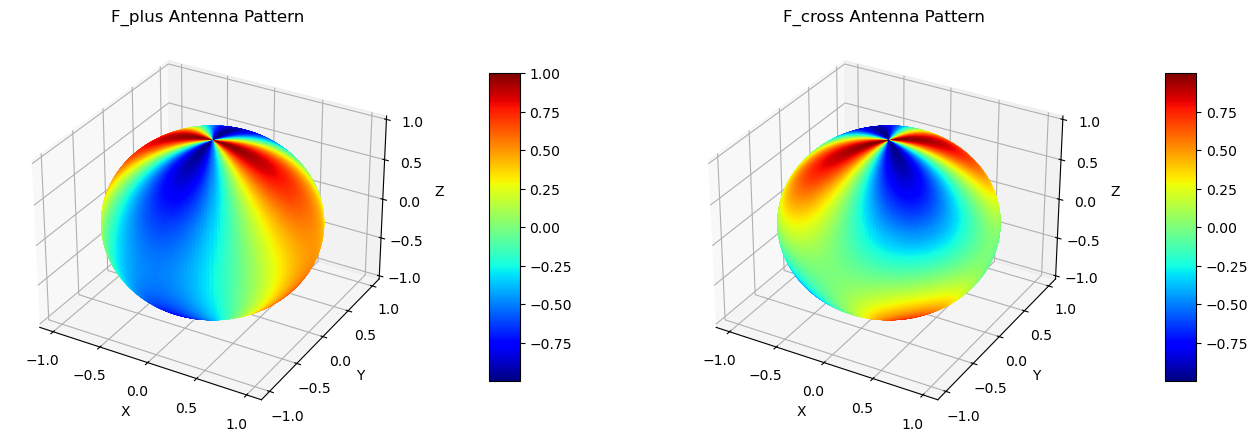

In [32]:
theta=np.linspace(0,np.pi,200)
phi=np.linspace(0,2*np.pi,200)
# phi=np.pi/2
theta,phi=np.meshgrid(theta,phi)

F_plus=(1/2*(1+np.cos(theta)**2)*np.cos(2*phi))
F_cross=(np.cos(theta)*np.sin(2*phi))

x=np.sin(theta)*np.cos(phi)
y=np.sin(theta)*np.sin(phi)
z=np.cos(theta)

fig=plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(121, projection='3d')
norm1 = plt.Normalize(vmin=F_plus.min(), vmax=F_plus.max())
colors1 = plt.cm.jet(norm1(F_plus))
surf1 = ax1.plot_surface(x, y, z, facecolors=colors1, rstride=1, cstride=1, antialiased=True, shade=False)
ax1.set_title('F_plus Antenna Pattern')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xticks([-1, -0.5, 0, 0.5, 1])
ax1.set_yticks([-1, -0.5, 0, 0.5, 1])
ax1.set_zticks([-1, -0.5, 0, 0.5, 1])
fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm1), ax=ax1, shrink=0.5, aspect=10, pad=0.15)

# 绘制 F_cross 天线图案
ax2 = fig.add_subplot(122, projection='3d')
norm2 = plt.Normalize(vmin=F_cross.min(), vmax=F_cross.max())
colors2 = plt.cm.jet(norm2(F_cross))
surf2 = ax2.plot_surface(x, y, z, facecolors=colors2, rstride=1, cstride=1, antialiased=True, shade=False)
ax2.set_title('F_cross Antenna Pattern')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xticks([-1, -0.5, 0, 0.5, 1])
ax2.set_yticks([-1, -0.5, 0, 0.5, 1])
ax2.set_zticks([-1, -0.5, 0, 0.5, 1])
fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=norm2), ax=ax2, shrink=0.5, aspect=10, pad=0.15)

# ax1=fig.add_subplot(121,projection='3d')
# surf1=ax1.plot_surface(x,y,z,facecolors=plt.cm.jet(F_plus),rstride=1,cstride=1,antialiased=True,shade=False)
# ax1.set_title('F_plus Antenna Pattern')
# ax1.set_xlabel('X')
# ax1.set_ylabel('Y')
# ax1.set_zlabel('Z')
# ax1.set_xticks([-1,-0.5,0,0.5,1])
# ax1.set_yticks([-1,-0.5,0,0.5,1])
# ax1.set_zticks([-1,-0.5,0,0.5,1])
# fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.jet),ax=ax1,shrink=0.5,aspect=10,pad=0.15)

# ax2=fig.add_subplot(122,projection='3d')
# surf2=ax2.plot_surface(x,y,z,facecolors=plt.cm.jet(F_cross),rstride=1,cstride=1,antialiased=True,shade=False)
# ax2.set_title('F_cross Antenna Pattern')
# ax2.set_xlabel('X')
# ax2.set_ylabel('Y')
# ax2.set_zlabel('Z')
# ax2.set_xticks([-1,-0.5,0,0.5,1])
# ax2.set_yticks([-1,-0.5,0,0.5,1])
# ax2.set_zticks([-1,-0.5,0,0.5,1])
# fig.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.jet),ax=ax2,shrink=0.5,aspect=10,pad=0.15)

## Tensors forms

In [3]:
theta=sp.pi/4
phi=sp.pi/4
psi=0  # no polarization

print('Theta:',theta)
print('Phi:',phi)
print('Psi:',psi)

# Polarization tensor
def pol_tensor(theta,phi,psi):
    if theta==0 or theta==sp.pi:
        x_hat=sp.Matrix([1,0,0])
        y_hat=sp.Matrix([0,-1,0])

    else:
        n_z_hat=sp.Matrix([0,0,1])
        n_hat=sp.Matrix([sp.sin(theta)*sp.cos(phi),sp.sin(theta)*sp.sin(phi),sp.cos(theta)]) # column vector
        y_hat=n_hat.cross(n_z_hat)
        norm=y_hat.norm()
        y_hat=y_hat/norm
        x_hat=n_hat.cross(y_hat)

        # x_hat=n_z_hat.cross(n_hat)  # This defination will cause an extra minor compared to analytic!!!!!!!!!
        # norm=x_hat.norm()
        # x_hat=x_hat/norm
        # y_hat=x_hat.cross(n_hat)

    # polarization angle as a rotation metric
    x_hat_pol=x_hat*sp.cos(psi)-y_hat*sp.sin(psi)
    y_hat_pol=x_hat*sp.sin(psi)+y_hat*sp.cos(psi)

    e_p= x_hat_pol*x_hat_pol.T-y_hat_pol*y_hat_pol.T 
    e_c= x_hat_pol*y_hat_pol.T+y_hat_pol*x_hat_pol.T 

    return {'e_plus tensor':e_p,
            'e_cross tensor':e_c}

pol_tensor_result=pol_tensor(theta=theta,phi=phi,psi=psi)
for key,value in pol_tensor_result.items():
    print(f"{key}: {value}")
print()
# print(pol_tensor_result['e_p'][0][2])

# L shape detector tensor
def detec_tensor_L():
    n_x_hat=[1,0,0]
    n_y_hat=[0,1,0]

    return (1/2)*(np.outer(n_x_hat,n_x_hat)-np.outer(n_y_hat,n_y_hat))

# Triangle shape detector tensor
def detec_tensor_triangle(t):
     n_x_hat=[-1/2,0,np.sqrt(3)/2]
     n_y_hat=[1,0,0]
     n_z_hat=[-1/2,0,-np.sqrt(3)/2]
    
    # Rotation of LISA
     T=1  # year
     x_rota=np.pi/3
     z_rota=(2*np.pi/T)*t
     R_x=np.array([
        [1, 0, 0],
        [0, np.cos(x_rota), -np.sin(x_rota)],
        [0, np.sin(x_rota), np.cos(x_rota)]])
     R_z = np.array([
        [np.cos(z_rota), -np.sin(z_rota), 0],
        [np.sin(z_rota), np.cos(z_rota), 0],
        [0, 0, 1]])
     
     n_x_hat=np.dot(R_z,np.dot(R_x,n_x_hat))
     n_y_hat=np.dot(R_z,np.dot(R_x,n_y_hat))
     n_z_hat=np.dot(R_z,np.dot(R_x,n_z_hat))
     
     return 1/(2*np.sqrt(3))*(np.outer(n_x_hat,n_x_hat)+np.outer(n_y_hat,n_y_hat)-2*np.outer(n_z_hat,n_z_hat))

print('Lshape Detector tensor:')
print(detec_tensor_L())
print()
print('Triangle Detector tensor:')
print(detec_tensor_triangle(t=0))
print()

# Anttenna partterns
def anttenna_partterns(shape,t,theta,phi,psi):
    if shape=='L':
        F_p=np.einsum('ij,ij->',detec_tensor_L(),pol_tensor(theta,phi,psi)['e_plus tensor'])
        F_c=np.einsum('ij,ij->',detec_tensor_L(),pol_tensor(theta,phi,psi)['e_cross tensor'])

        return {'F plus':F_p,
                'F cross':F_c}
    
    elif shape=='triangle':
        F_p=np.einsum('ij,ij->',detec_tensor_triangle(t),pol_tensor(theta,phi,psi)['e_plus tensor'])
        F_c=np.einsum('ij,ij->',detec_tensor_triangle(t),pol_tensor(theta,phi,psi)['e_cross tensor'])

        return {'F plus':F_p,
                'F cross':F_c}
    
    else:
        raise ValueError('Shape not supported')

# Anttenna partterns for L shape
shape='L'
F=anttenna_partterns(shape,t=0,theta=theta,phi=phi,psi=psi)
print('For L shape detector, the antenna patterns are:')
for key,value in F.items():
    print(f"{key}: {value.evalf()}")
print()

Theta: pi/4
Phi: pi/4
Psi: 0
e_plus tensor: Matrix([[-1/4, 3/4, -sqrt(2)/4], [3/4, -1/4, -sqrt(2)/4], [-sqrt(2)/4, -sqrt(2)/4, 1/2]])
e_cross tensor: Matrix([[sqrt(2)/2, 0, -1/2], [0, -sqrt(2)/2, 1/2], [-1/2, 1/2, 0]])

Lshape Detector tensor:
[[ 0.5  0.   0. ]
 [ 0.  -0.5  0. ]
 [ 0.   0.   0. ]]

Triangle Detector tensor:
[[ 0.21650635  0.32475953 -0.1875    ]
 [ 0.32475953 -0.16237976  0.09375   ]
 [-0.1875      0.09375    -0.05412659]]

For L shape detector, the antenna patterns are:
F plus: 0
F cross: 0.707106781186548



# 2. Polarization

In [4]:
theta=sp.pi/4
phi=sp.pi/4
psi=sp.pi/2
# psi=0   # no polarization
print('theta =',theta)
print('phi =',phi)
print('psi =',psi)
print()

pol_tensor_result=pol_tensor(theta,phi,psi)
for key,value in pol_tensor_result.items():
    print(f"{key}: {value}")
print()

shape='L'
F=anttenna_partterns(shape,t=0,theta=theta,phi=phi,psi=psi)
print('For L shape detector, the antenna patterns are:')
for key,value in F.items():
    print(f"{key}: {value.evalf()}")
print()

theta = pi/4
phi = pi/4
psi = pi/2

e_plus tensor: Matrix([[1/4, -3/4, sqrt(2)/4], [-3/4, 1/4, sqrt(2)/4], [sqrt(2)/4, sqrt(2)/4, -1/2]])
e_cross tensor: Matrix([[-sqrt(2)/2, 0, 1/2], [0, sqrt(2)/2, -1/2], [1/2, -1/2, 0]])

For L shape detector, the antenna patterns are:
F plus: 0
F cross: -0.707106781186548



#

# 3. Strain signal from a non-evolving binary

Theta: pi/2
Phi: pi/2
Psi: pi/2
Duration time(year): 5
Number of sampling points: 500

5.00000000000000e-22


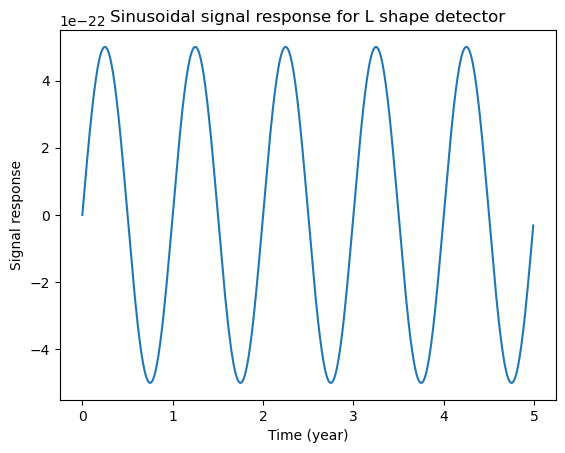

In [5]:
theta=sp.pi/2
phi=sp.pi/2
psi=sp.pi/2

T=5  # signal duration time(year)
sample_freq=100 # sampling frequency delta_f > 2*max(fs)
sample_interval=1/sample_freq  # sampling interval delta_t
N=int(T/sample_interval)  # number of sampling points

t=np.arange(0,T,sample_interval)  # year
# t=[0] 
print('Theta:',theta)
print('Phi:',phi)
print('Psi:',psi)
print('Duration time(year):',T)
print('Number of sampling points:',N)
print()

# h+ and hx in sinusoidal form
def h_p(A,f0,t):
    return A*np.sin(2*np.pi*f0*t)  

def h_c(B,f0,t,phase):
    return B*np.sin(2*np.pi*f0*t+phase)

# Strain signal
def s(A,B,f0,t,phase,shape):
    hp_t=h_p(A,f0,t)
    hc_t=h_c(B,f0,t,phase)
    s_t=[]
    for i in range(len(t)):
        F=anttenna_partterns(shape,t=t[i],theta=theta,phi=phi,psi=psi)
        s_t.append(hp_t[i]*F['F plus'].evalf()
                   +
                   hc_t[i]*F['F cross'].evalf())
    return s_t

s_t=s(A=10**(-21),B=10**(-21),f0=1,t=t,phase=np.pi/2,shape='L')

plt.figure()
plt.plot(t,s_t)
plt.xlabel('Time (year)')
plt.ylabel('Signal response')
plt.title('Sinusoidal signal response for L shape detector')   
print(max(s_t)) 


# 4. Strain signal for a static interferomrter

Theta: pi/2
Phi: pi/2
Psi: 0
Duration time(year): 5
Number of sampling points: 500



Text(0.5, 1.0, 'Other form signal response for L shape detector')

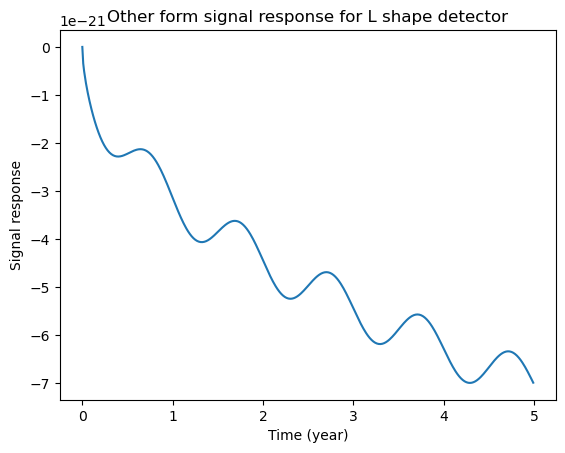

In [6]:
#  Inputs
theta=sp.pi/2
phi=sp.pi/2
psi=0 # no polarization

T=5  # signal duration time(year)
sample_freq=100 # sampling frequency delta_f > 2*max(fs)
sample_interval=1/sample_freq  # sampling interval delta_t
N=int(T/sample_interval)  # number of sampling points

t=np.arange(0,T,sample_interval)  # year
# t=[0] 
print('Theta:',theta)
print('Phi:',phi)
print('Psi:',psi)
print('Duration time(year):',T)
print('Number of sampling points:',N)
print()

# h+ and hx in other form
def h_p(A,f0,t):
    return A*(2*np.pi*f0*np.sqrt(t)+np.sin(2*np.pi*f0*t))

def h_c(B,f0,t,phase):
    return B*(2*np.pi*f0*np.sqrt(t)+phase+np.sin(2*np.pi*f0*t+phase))

# Strain signal
def s(A,B,f0,t,phase,shape):
    hp_t=h_p(A,f0,t)
    hc_t=h_c(B,f0,t,phase)
    s_t=[]
    for i in range(len(t)):
        F=anttenna_partterns(shape,t=t[i],theta=theta,phi=phi,psi=psi)
        s_t.append(hp_t[i]*F['F plus'].evalf()
                   +
                   hc_t[i]*F['F cross'].evalf())
    return s_t

s_t=s(A=10**(-21),B=10**(-21),f0=1,t=t,phase=np.pi/2,shape='L')

plt.figure()
plt.plot(t,s_t)
plt.xlabel('Time (year)')
plt.ylabel('Signal response')
plt.title('Other form signal response for L shape detector')    

# Antenna patterns for LISA

# 1. Antenna patterns for LISA Michelson TDI

Theta: pi/2
Phi: pi/2
Psi: 0
Duration time(year): 5
Number of sampling points: 500



Text(0.5, 1.0, 'Antenna patterns for LISA')

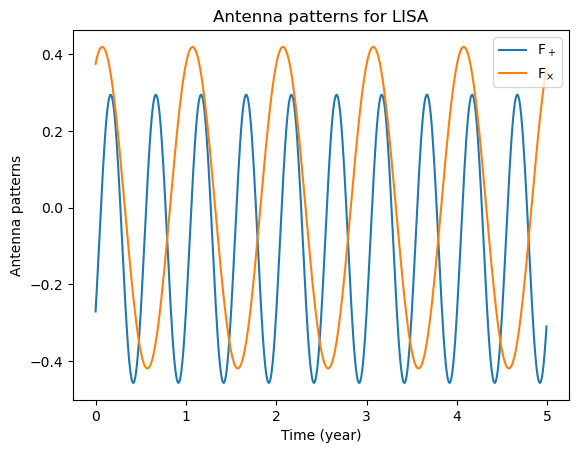

In [7]:
theta=sp.pi/2
phi=sp.pi/2
psi=0  # no polarization
# psi=sp.pi/2

T=5  # signal duration time(year)
sample_freq=100 # sampling frequency delta_f > 2*max(fs)
sample_interval=1/sample_freq  # sampling interval delta_t
N=int(T/sample_interval)  # number of sampling points

t=np.arange(0,T,sample_interval)  # year
# t=[0] 
print('Theta:',theta)
print('Phi:',phi)
print('Psi:',psi)
print('Duration time(year):',T)
print('Number of sampling points:',N)
print()

# Anttenna partterns for LISA
LISA_anttenna={'F plus':[],'F cross':[]}
for i in range(len(t)):
    shape='triangle'
    F=anttenna_partterns(shape,t=t[i],theta=theta,phi=phi,psi=psi)
    LISA_anttenna['F plus'].append(F['F plus'].evalf())
    LISA_anttenna['F cross'].append(F['F cross'].evalf())
    # print(f'For Triangle shape TDI at time {t[i]} year, the antenna patterns are:')
    # for key,value in Anttenna_parttern_result.items():
    #     print(f"{key}: {value.evalf()}")
    # print()

plt.figure()
plt.plot(t,LISA_anttenna['F plus'],label=r'$\mathrm{F_+}$')
plt.plot(t,LISA_anttenna['F cross'],label=r'$\mathrm{F_×}$')
plt.xlabel('Time (year)')
plt.ylabel('Antenna patterns')
plt.legend()
plt.title('Antenna patterns for LISA')


# 2. Toy LISA response: Partial

Text(0.5, 1.0, 'FFT of h+, hx and signal response')

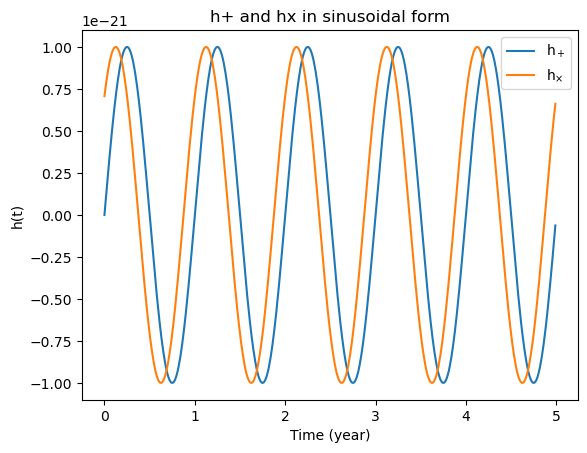

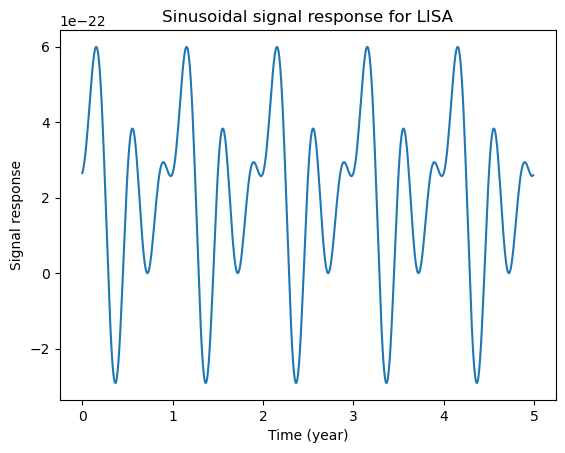

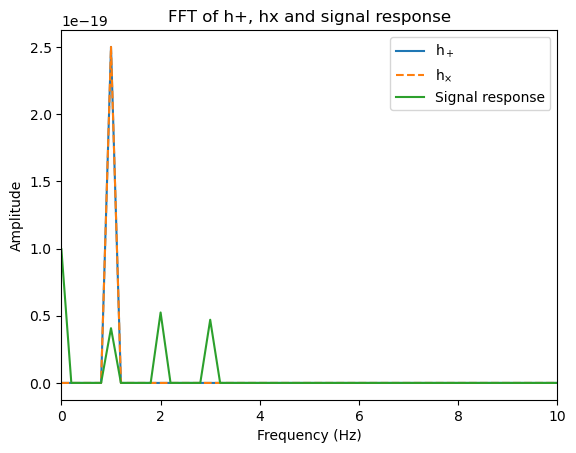

In [8]:
# h+ and hx in sinusoidal form
def h_p(A,f,t,phase):
    return A*np.sin(2*np.pi*f*t+phase)  

def h_c(A,f,t,phase):
    return A*np.sin(2*np.pi*f*t+phase+np.pi/4)

# Signal response
def s(A,f,t,phase,shape):
    hp_t=h_p(A,f,t,phase)
    hc_t=h_c(A,f,t,phase)
    s_t=[]
    for i in range(len(t)):
        F=anttenna_partterns(shape,t=t[i],theta=theta,phi=phi,psi=psi)
        s_t.append(hp_t[i]*F['F plus'].evalf()
                   +
                   hc_t[i]*F['F cross'].evalf())
    return s_t

# FFT
hp_t=h_p(A=10**(-21),f=1,t=t,phase=0)
hc_t=h_c(A=10**(-21),f=1,t=t,phase=0)
s_t=s(A=10**(-21),f=1,t=t,phase=0,shape='triangle')
hp_f=np.fft.rfft(hp_t)
hc_f=np.fft.rfft(hc_t)
s_f=np.fft.rfft(s_t)
f=np.fft.rfftfreq(N,sample_interval)

plt.figure()
plt.plot(t,hp_t,label=r'$\mathrm{h_+}$')
plt.plot(t,hc_t,label=r'$\mathrm{h_×}$')
plt.xlabel('Time (year)')
plt.ylabel('h(t)')
plt.legend()
plt.title('h+ and hx in sinusoidal form')

plt.figure()
plt.plot(t,s_t)
plt.xlabel('Time (year)')
plt.ylabel('Signal response')
plt.title('Sinusoidal signal response for LISA')    

plt.figure()
plt.plot(f,np.abs(hp_f),label=r'$\mathrm{h_+}$')
plt.plot(f,np.abs(hc_f),'--',label=r'$\mathrm{h_×}$')
plt.plot(f,np.abs(s_f),label='Signal response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0,10)
plt.legend()
plt.title('FFT of h+, hx and signal response')

# 3. Toy LISA response: Full

Theta: 1.5707963267948966
Phi: 3.141592653589793
Psi: 0
Duration time(year): 2
Number of sampling points: 200

The position of LISA at t=0 : [0.9184850993605149, -1.5e+16, array(0)]
GW wave propagation direction: [1.0, -1.2246467991473532e-16, -6.123233995736766e-17]


Text(0.5, 1.0, 'FFT of signal response')

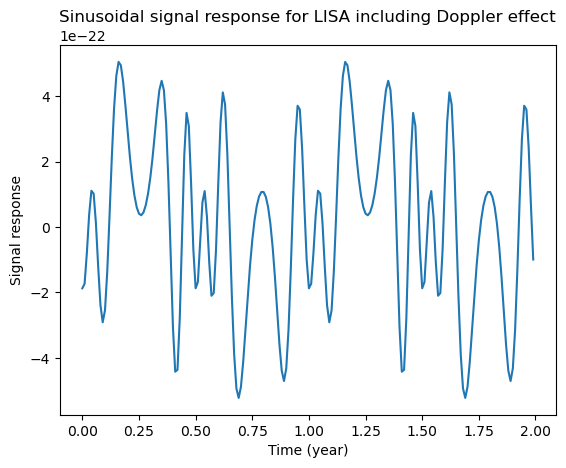

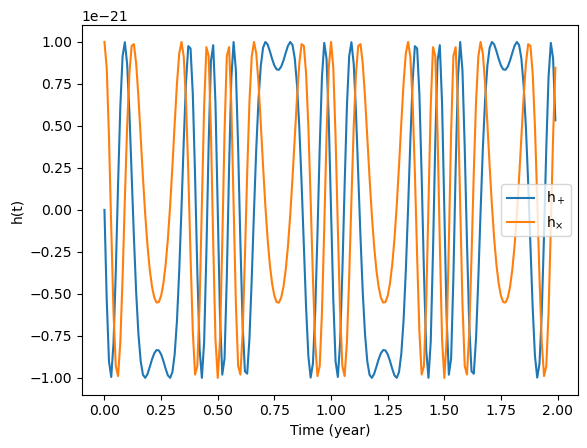

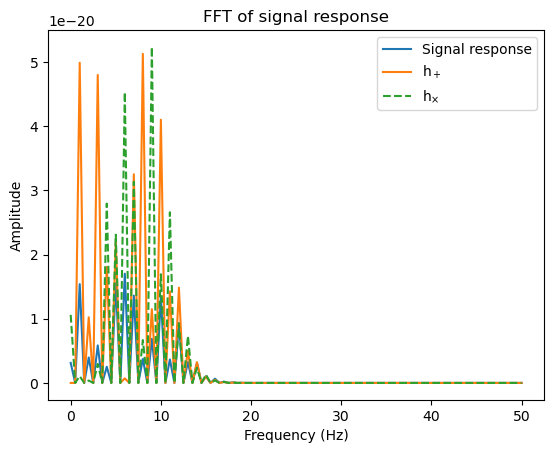

In [24]:
theta=np.pi/2
phi=np.pi
psi=0  # no polarization
# psi=sp.pi/2

T=2  # signal duration time(year)
sample_freq=100 # sampling frequency delta_f > 2*max(fs)
sample_interval=1/sample_freq  # sampling interval delta_t
N=int(T/sample_interval)  # number of sampling points

t=np.arange(0,T,sample_interval)  # year
# t=[0] 
print('Theta:',theta)
print('Phi:',phi)
print('Psi:',psi)
print('Duration time(year):',T)
print('Number of sampling points:',N)
print()

# The position of LISA
def r_LISA(t):  # year
    R=1.5*10**16  # m
    x=R*np.cos(2*np.pi*t-np.pi/2)
    y=R*np.sin(2*np.pi*t-np.pi/2)
    z=np.zeros_like(t)
    return [x,y,z]

r=r_LISA(0)
print('The position of LISA at t=0 :',r)

# GW wave propagation direction
n_gw=[-np.sin(theta)*np.cos(phi),-np.sin(theta)*np.sin(phi),-np.cos(theta)]
# n_gw=[1,0,0]
print('GW wave propagation direction:',n_gw)

# h+ and hx in sinusoidal form including Doppler effect
def h_p(A,t):
    omega=2*np.pi
    c=3*10**8*365*24*60*60 # m/year
    r=r_LISA(t)
    return A*np.sin(omega*(t-(np.dot(n_gw,r)/c)))

def h_c(B,t):
    omega=2*np.pi
    c=3*10**8*365*24*60*60
    r=r_LISA(t)
    return B*np.cos(omega*(t-(np.dot(n_gw,r)/c)))

def s(t,A,B):
    s_t=[]
    for i in range(len(t)):
        hp_t=h_p(A,t=t[i])
        hc_t=h_c(B,t=t[i])
        F=anttenna_partterns(shape='triangle',t=t[i],theta=theta,phi=phi,psi=psi)
        s_t.append(hp_t*F['F plus'].evalf()
                   +
                   hc_t*F['F cross'].evalf())
    return s_t

s_t=s(t=t,A=10**(-21),B=10**(-21))  # year, m

plt.figure()
plt.plot(t,s_t)
plt.xlabel('Time (year)')
plt.ylabel('Signal response')
plt.title('Sinusoidal signal response for LISA including Doppler effect')

# FFT
hp_t=h_p(A=10**(-21),t=t)
hc_t=h_c(B=10**(-21),t=t)
hp_f=np.fft.rfft(hp_t)
hc_f=np.fft.rfft(hc_t)
s_f=np.fft.rfft(s_t)
f=np.fft.rfftfreq(N,sample_interval)

plt.figure()
plt.plot(t,hp_t,label=r'$\mathrm{h_+}$')
plt.plot(t,hc_t,label=r'$\mathrm{h_×}$')
plt.xlabel('Time (year)')
plt.ylabel('h(t)')
plt.legend()

plt.figure()
plt.plot(f,np.abs(s_f),label='Signal response')
plt.plot(f,np.abs(hp_f),label=r'$\mathrm{h_+}$')
plt.plot(f,np.abs(hc_f),'--',label=r'$\mathrm{h_×}$')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT of signal response')




# Advanced: response of Tianqin

In [50]:
print('To be coded (∩_∩)')

To be coded (∩_∩)
